In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, confusion_matrix
import numpy as np

In [ ]:
df = sns.load_dataset('iris')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
X = df.drop('species', axis=1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
inertia = []
k_range = range(1, 10)

In [ ]:
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

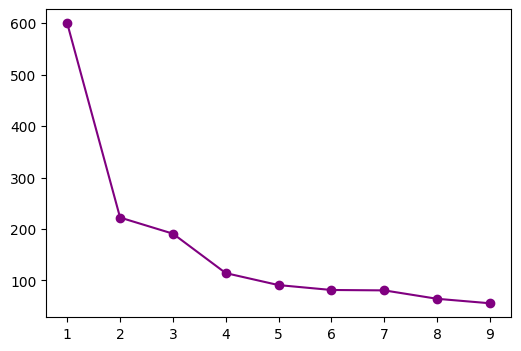

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, marker='o', color='purple')

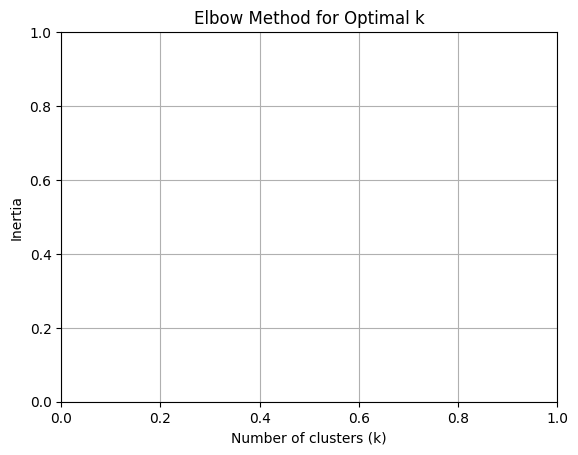

In [ ]:
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
sil_score = silhouette_score(X_scaled, df['cluster'])
print(f"\nSilhouette Score: {round(sil_score, 3)}")


Silhouette Score: 0.48


In [ ]:
comparison = pd.DataFrame({'Actual': df['species'], 'Cluster': df['cluster']})

In [ ]:
conf_mat = pd.crosstab(comparison['Actual'], comparison['Cluster'])

In [ ]:
print("\nConfusion Matrix (Species vs Cluster):")
print(conf_mat)


Confusion Matrix (Species vs Cluster):
Cluster      0   1   2
Actual                
setosa       0  33  17
versicolor  46   0   4
virginica   50   0   0


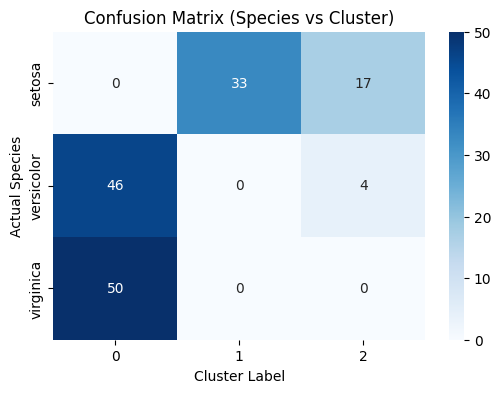

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix (Species vs Cluster)")
plt.ylabel("Actual Species")
plt.xlabel("Cluster Label")
plt.show()

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

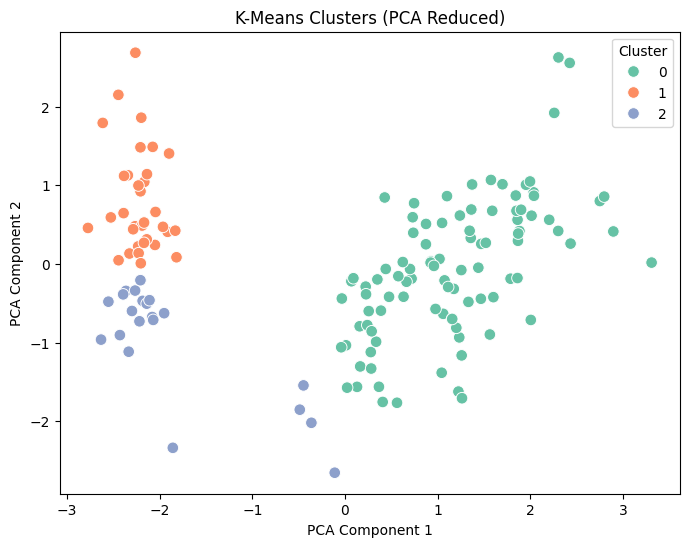

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2', s=70)
plt.title("K-Means Clusters (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

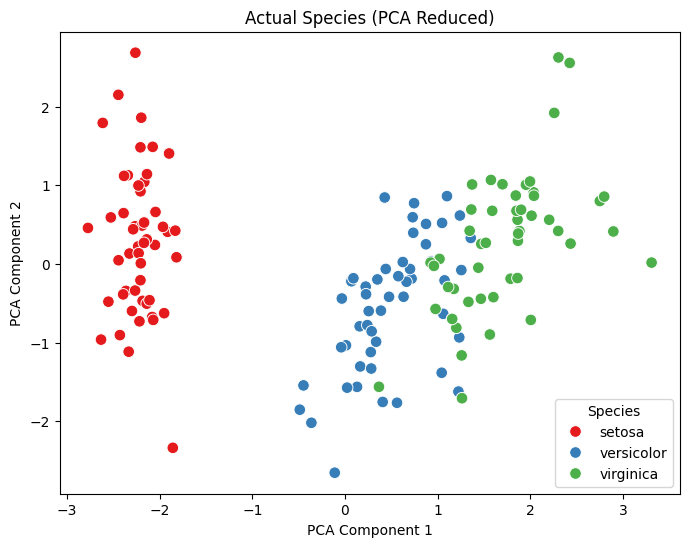

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='species', palette='Set1', s=70)
plt.title("Actual Species (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Species')
plt.show()